# Question 1

### Part a)

[-0.06574395+0.j         -0.06574392-0.00022613j -0.06574384-0.00045227j
 ... -0.06574372+0.00067842j -0.06574384+0.00045227j
 -0.06574392+0.00022613j]


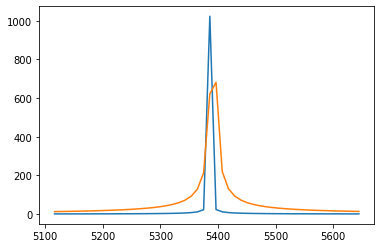

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

# returns the frequency for a given bin number
def bin_to_freq(bin_num, srate, dft_length):
    return bin_num*(srate/dft_length)

# number of samples
srate = 22050 # sampling frequency / Number of frequency bins
dft_length = 2048

freq1 = bin_to_freq(500, srate, dft_length)
freq2 = bin_to_freq(500.5, srate, dft_length)

sin1 = sinusoid(freq=freq1, srate=srate)
sin2 = sinusoid(freq=freq2, srate=srate)

yf1 = np.fft.fft(sin1, n=dft_length)
yf2 = np.fft.fft(sin2, n=dft_length)

x = np.linspace(0, srate, dft_length)

lo = 475
hi = 525
plt.plot(x[lo:hi], np.abs(yf1[lo:hi])),
plt.plot(x[lo:hi], np.abs(yf2[lo:hi])),
plt.show()


The above plot shows two sine waves of 500hz and 500.5hz in the frequency domain. The 600hz sine wave only has non-zero amplitude in the 500th frequency bin, whereas the 500.5hz sine wave appears to be distrubuted across multiple frequency bins about the 500th bin. 

This distribution is due to the fact that each bin is a discrete measurement of frequency in samples. Therefore, 500.5 falls between bin 500 and 501. Since 500.5hz will not be at maximum amplitude when sampled at 500 and 501, it will result in a lower amplitude in the frequency domain. Further, since 500.5 when sampled at 500 and 501 will produce a periodic values, and therefore will be represented with non-zero values in the frequency domain.

### Part b)

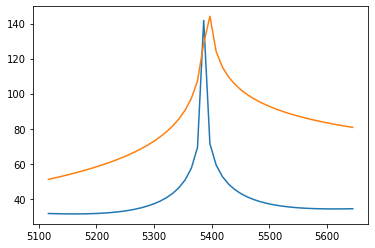

In [2]:
# number of samples
srate = 22050 # sampling frequency / Number of frequency bins
dft_length = 2048

freq1 = bin_to_freq(500, srate, dft_length)
freq2 = bin_to_freq(500.5, srate, dft_length)

sin1 = sinusoid(freq=freq1, srate=srate)
sin2 = sinusoid(freq=freq2, srate=srate)

yf1 = np.fft.fft(sin1, n=dft_length)
yf2 = np.fft.fft(sin2, n=dft_length)

# convert to dBFS
yf1 = 20*np.log(yf1)
yf2 = 20*np.log(yf2)

x = np.linspace(0, srate, dft_length)

lo = 475
hi = 525
plt.plot(x[lo:hi], np.abs(yf1[lo:hi])),
plt.plot(x[lo:hi], np.abs(yf2[lo:hi])),
plt.show()

### Part c)

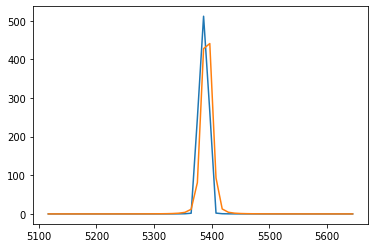

In [15]:
import math

def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

def apply_hanning_window(signal, window):
    signal_size = len(signal)
    window_size = len(window)
    start = 0
    for i in range(1, math.ceil(signal_size/window_size)):
        end = i*window_size
        signal[start:end]*=window
        start = end
    
# number of samples
srate = 22050 # sampling frequency / Number of frequency bins
dft_length = 2048

freq1 = bin_to_freq(500, srate, dft_length)
freq2 = bin_to_freq(500.5, srate, dft_length)

window = np.hanning(dft_length)

sin1 = sinusoid(freq=freq1, srate=srate)
sin2 = sinusoid(freq=freq2, srate=srate)

apply_hanning_window(sin1, window)
apply_hanning_window(sin2, window)

yf1 = np.fft.fft(sin1, n=dft_length)
yf2 = np.fft.fft(sin2, n=dft_length)
    
x = np.linspace(0, srate, dft_length)

lo = 475
hi = 525
plt.plot(x[lo:hi], np.abs(yf1[lo:hi])),
plt.plot(x[lo:hi], np.abs(yf2[lo:hi])),
plt.show()

The above plot has a hanning window equivalent to the srate of the generated sinusoids. Any discontinuities in the previous graphs have been smoothed out as a result. The resultant frequency spectrum shows two distinct spikes in their respective frequency bins.   

# Question 2

### Part a)

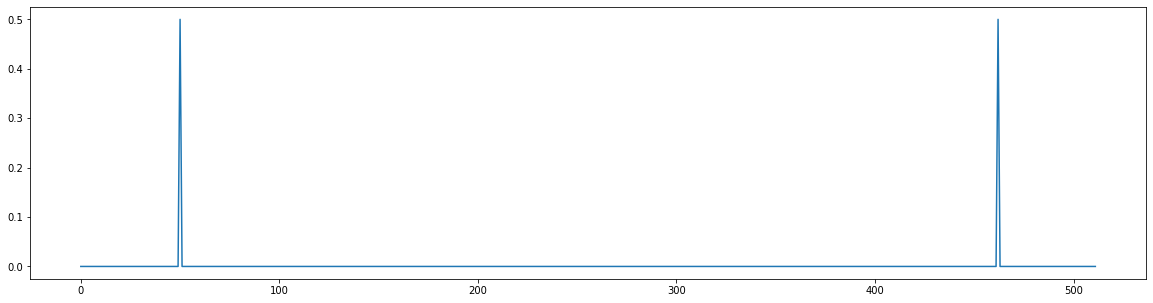

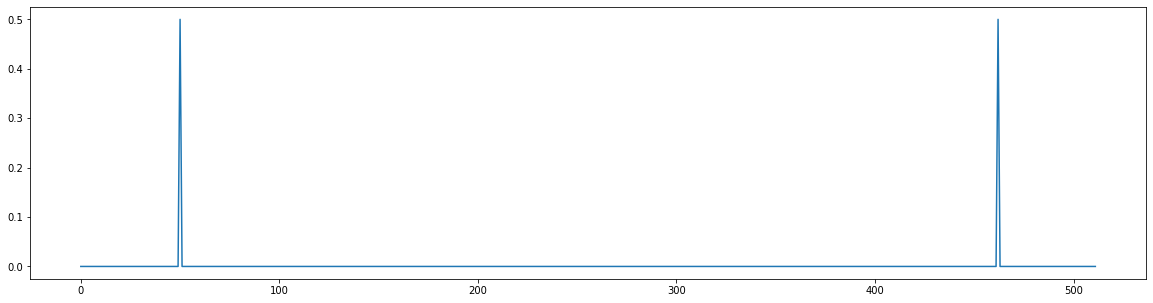

In [4]:
def pedagogical_dft(x, N):         
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N): 
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N)   # inner product with imaginary basis k
    return (X_re, X_im)

def pedagogical_dft_modified(x, N):         
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N): 
        freq_terms = k * 2 * np.pi / N
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * freq_terms)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * freq_terms)   # inner product with imaginary basis k
    return (X_re, X_im)

def plot_mag_spectrum(Xmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)

N = 512 
n = np.arange(0,N)

# Single sinusoid 
k=50
x1 = 0.5 * np.sin(k*n*2*np.pi/N)

(X_re, X_im) = pedagogical_dft(x1, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) /N
plot_mag_spectrum(Xmag)

(X_re, X_im) = pedagogical_dft_modified(x1, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) /N
plot_mag_spectrum(Xmag)



### Part b)

In [10]:
def chunked_dft(signal, dft_length, dft):
    signal_len = len(signal)
    start = 0
    for i in range(1,math.ceil(signal_len/dft_length)):
        end = i*dft_length
        dft_segment = signal[start:end]
        dft(dft_segment, segment_stepsize)
        start=end    
        
# generate a sinusoid with some noise
srate = 44100 # sampling frequency / Number of frequency bins
dft_length = 512

data = sinusoid(440, srate=srate)
noise = np.random.normal(0, 1.0, len(data))
data_with_noise = data + noise

runs = 5

# Run FFT
print('---fft---')
for i in range(runs):
    %time np.fft.fft(data_with_noise)

# Run DFT's

# Run pedagogical_dft with a window size of dft_length=2048
print('---pedagogical_dft---')
for i in range(runs):
    %time chunked_dft(data_with_noise, dft_length, pedagogical_dft)

# Run pedagogical_dft_modified with a window size of dft_length=2048
print('---pedagogical_dft_modified---')
for i in range(runs):
    %time chunked_dft(data_with_noise, dft_length, pedagogical_dft_modified)



---fft---
CPU times: user 6.67 ms, sys: 1.21 ms, total: 7.88 ms
Wall time: 9.6 ms
CPU times: user 2.77 ms, sys: 200 µs, total: 2.97 ms
Wall time: 2.79 ms
CPU times: user 2.69 ms, sys: 177 µs, total: 2.86 ms
Wall time: 2.62 ms
CPU times: user 3.49 ms, sys: 230 µs, total: 3.72 ms
Wall time: 4.17 ms
CPU times: user 5.12 ms, sys: 183 µs, total: 5.3 ms
Wall time: 4.94 ms
---pedagogical_dft---
CPU times: user 2.26 s, sys: 46 ms, total: 2.31 s
Wall time: 2.29 s
CPU times: user 2.34 s, sys: 39 ms, total: 2.38 s
Wall time: 2.39 s
CPU times: user 2.2 s, sys: 26.5 ms, total: 2.22 s
Wall time: 2.22 s
CPU times: user 2.28 s, sys: 25.2 ms, total: 2.31 s
Wall time: 2.32 s
CPU times: user 2.2 s, sys: 15.5 ms, total: 2.21 s
Wall time: 2.21 s
---pedagogical_dft_modified---
CPU times: user 2.17 s, sys: 27.1 ms, total: 2.2 s
Wall time: 2.18 s
CPU times: user 2.25 s, sys: 65 ms, total: 2.31 s
Wall time: 2.29 s
CPU times: user 2.39 s, sys: 26.3 ms, total: 2.41 s
Wall time: 2.45 s
CPU times: user 2.19 s, sys

### Part c)

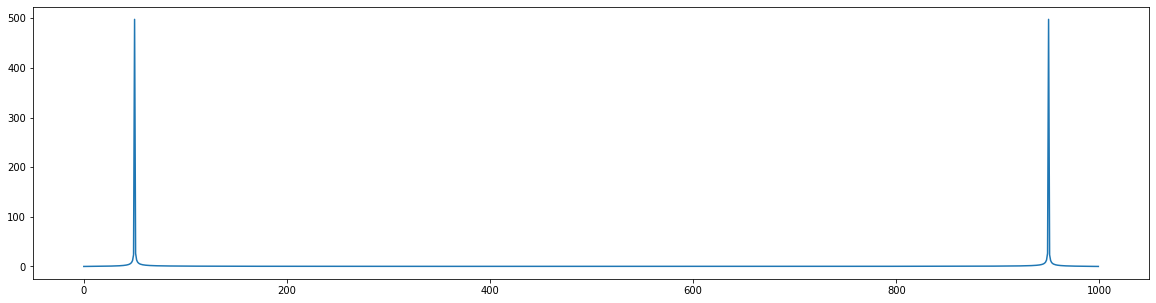

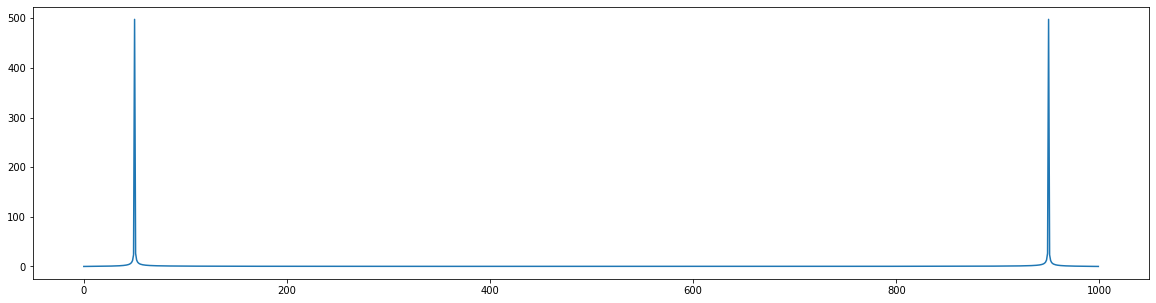

In [113]:
def my_dft_old(x, N, freq_array, srate):
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    rad_array = freq_array*( 2 * np.pi / N ) # convert to rad/s
    
    for k, rad_term in enumerate(rad_array): 
        for t in freq_array: 
            X_re[k] += x[t] * np.cos(t * rad_term)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * rad_term)   # inner product with imaginary basis k
    return (X_re, X_im)

def my_dft(x, N, freq_array, srate):
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    rad_array = freq_array*( 2 * np.pi / srate ) # convert to rad/s
    
    for k, rad_term in enumerate(rad_array): 
        for t in range(srate): 
            X_re[k] += x[t] * np.cos(t * rad_term)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * rad_term)   # inner product with imaginary basis k
    return (X_re, X_im)

srate = 1000
N = srate 
n = np.arange(0,N)

x1 = sinusoid(freq=50, dur=1, srate=srate)

(X_re, X_im) = my_dft(x1, N, np.arange(0, N), srate)
Xmag = np.sqrt(X_re * X_re + X_im * X_im)
plot_mag_spectrum(Xmag)

(X_re, X_im) = pedagogical_dft(x1, N)
Xmag = np.sqrt(X_re * X_re + X_im * X_im)
plot_mag_spectrum(Xmag)

    

### Part d)

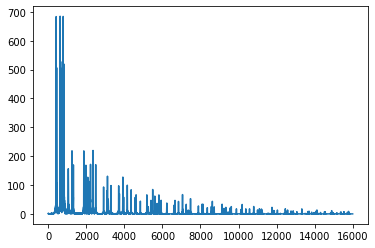

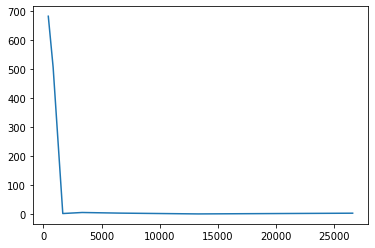

In [146]:
import soundfile as sf
from scipy.signal import find_peaks

def octaveTransform(wave, srate, yf):
    # Estimate the fundamental from the fourier transform. 
    # I played with the variables  a bit here to get a nice plot
    peaks, _ = find_peaks(abs(yf), threshold=2, distance=50)
    fund=peaks[0]

    # Obtain the octaves in the range from fund to SRATE
    max_range = int(np.log2(srate)) - int(np.log2(fund))
    octaves = [fund*2**i for i in range(srate) if i < max_range+1]
    octaves = np.asarray(octaves)

    (X_re, X_im) = my_dft(wave, len(octaves), octaves, srate)
    Xmag = np.sqrt(X_re * X_re + X_im * X_im)

    x = np.arange(0,srate,srate/window_size)
    plt.plot(octaves, Xmag)
    plt.show()

# Plot FFT for OOT_Secret.wav
wave, srate = sf.read("OOT_Secret.wav")
wave = wave[:, 0]
yf = np.fft.fft(wave, n=srate)
plt.plot(np.abs(yf[:srate//2]))
plt.show()

octaveTransform(wave, srate, yf)

    


# Question 3

### Part a)

In [8]:
srate = 8000
duration = 3.0
sin100 = sinusoid(freq=100.0, dur=duration, srate=srate, amp=0, phase=0.0) # 0 mag = 0 amp won't add any sound
sin200 = sinusoid(freq=200.0, dur=duration, srate=srate, amp=12226.0, phase=1.508)
sin300 = sinusoid(freq=300.0, dur=duration, srate=srate, amp=0, phase=0)
sin400 = sinusoid(freq=400.0, dur=duration, srate=srate, amp=29416, phase=1.876)
sin500 = sinusoid(freq=400.0, dur=duration, srate=srate, amp=48836 , phase=-0.185)

ah_sin = sin100 + sin200 + sin300 + sin400 + sin500

sf.write('ah_sine.wav', ah_sin, srate)

### Part b)

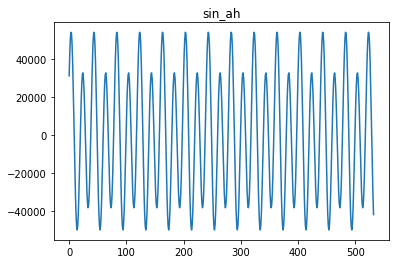

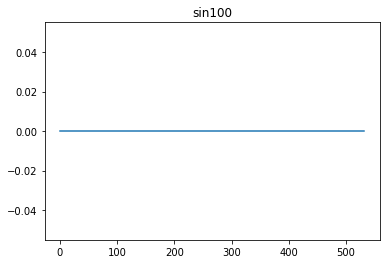

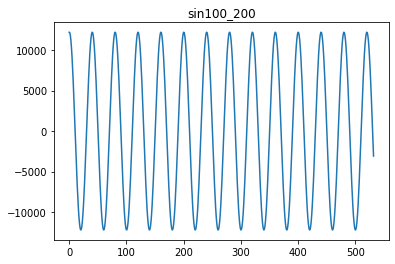

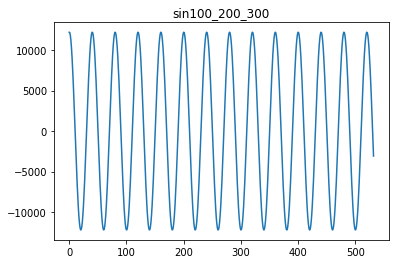

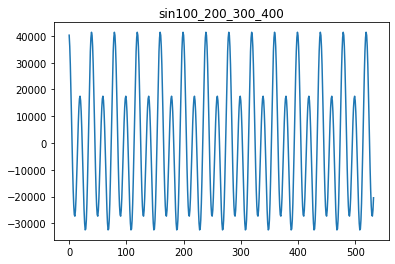

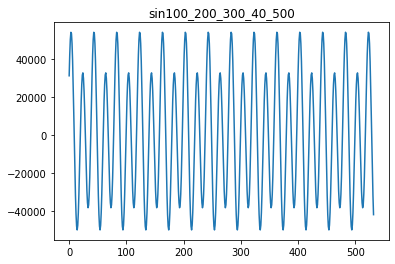

In [9]:
plt_range = 15

plt.plot(ah_sin[:srate//plt_range]), plt.title("sin_ah")
plt.show()

sin100 = sin100
plt.plot(sin100[:srate//plt_range]), plt.title("sin100")
plt.show()

sin100_200 = sin100 + sin200
plt.plot(sin100_200[:srate//plt_range]), plt.title("sin100_200")
plt.show()

sin100_200_300 = sin100_200 + sin300
plt.plot(sin100_200_300[:srate//plt_range]), plt.title("sin100_200_300")
plt.show()

sin100_200_300_400 = sin100_200 + sin300 + sin400
plt.plot(sin100_200_300_400[:srate//plt_range]), plt.title("sin100_200_300_400")
plt.show()

plt.plot(ah_sin[:srate//plt_range]), plt.title("sin100_200_300_40_500")
plt.show()